In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import src.basic_function_cap as bfc
import src.piano_key_notes as pkn
import src.hands as h
import ipywidgets as widgets
from ipywidgets import interact

In [2]:
octave = 0
notes = ['la','la#','si','do','do#','ré','ré#','mi','fa','fa#','sol','sol#']
name_notes = []
for i in range(88):
    if notes[i%12] == 'do':
        octave += 1
    if notes[i%12][-1] == "#":
        name_notes.append(notes[i%12][:-1]+str(octave)+'#')
    else:
        name_notes.append(notes[i%12]+str(octave))

## Observe

In [3]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, mask = bfc.get_frame(cap, 814)
mask = bfc.crop_frame(mask, 375, 0, 540-375, mask.shape[1], show=False)

def show_diff(frame, shift):
    _, img = bfc.get_frame(cap, frame)
    img = bfc.crop_frame(img, 375, 0, 540-375, img.shape[1], show=False)
    image2 = img - mask + shift
    plt.figure(figsize=(20,7))
    plt.imshow(image2)
    plt.show()

interact(show_diff, frame=widgets.IntSlider(min=0,max=cap.get(cv2.CAP_PROP_FRAME_COUNT)-1,step=1,value=28),
shift=widgets.IntSlider(min=0,max=20,step=1,value=10))

interactive(children=(IntSlider(value=28, description='frame', max=915), IntSlider(value=10, description='shif…

<function __main__.show_diff(frame, shift)>

In [4]:
means = np.load('npy/means.npy')

In [5]:
def show(frame):
    means = np.load('npy/means.npy')
    plt.figure(figsize=(20,6))
    plt.plot(means[frame])
    plt.xticks(range(88), name_notes, rotation=90)
    plt.show()

interact(show, frame=widgets.IntSlider(min=0,max=means.shape[0]-1,step=1,value=0))

interactive(children=(IntSlider(value=0, description='frame', max=815), Output()), _dom_classes=('widget-inter…

<function __main__.show(frame)>

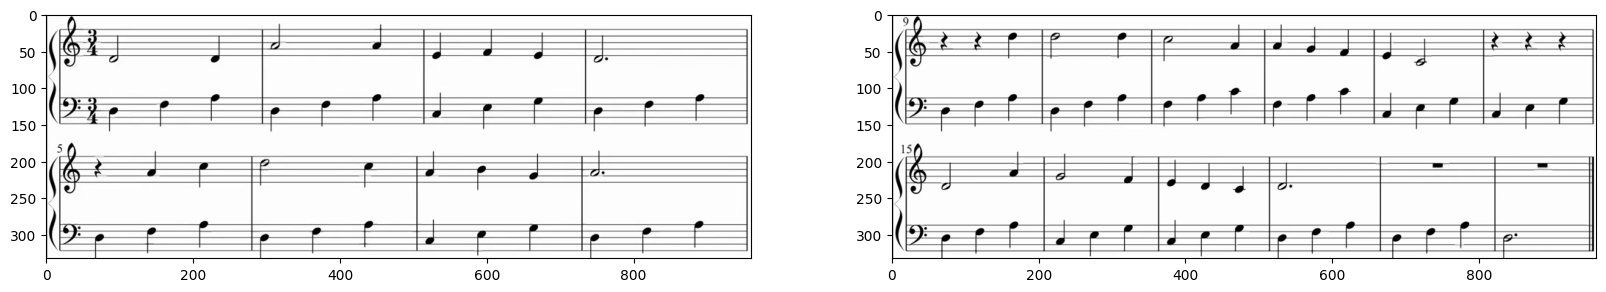

interactive(children=(IntSlider(value=0, description='frame', max=815), IntSlider(value=0, description='shift'…

<function __main__.show(frame, shift)>

In [6]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img1 = bfc.crop_frame(frame, 8, 158, 340-8, 960)
_, frame = bfc.get_frame(cap, 700)
img2 = bfc.crop_frame(frame, 8, 158, 340-8, 960)
# show img1 and img2 left and right
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

def show(frame, shift):
    means = np.load(f'npy/mean_{shift}.npy')
    meansRGB = np.zeros((means.shape[0],means.shape[1]))
    for i in range(means.shape[0]):
        meansRGB[i] = np.mean(means[i], axis=1)
    plt.figure(figsize=(20,5))
    plt.plot(range(20,61), meansRGB[frame][20:61])
    plt.ylim(0,255)
    plt.scatter(range(20,61), meansRGB[frame][20:61], c=meansRGB[frame][20:61])
    for i in range(20,61):
        if meansRGB[frame][i] > 20:
            plt.text(i, meansRGB[frame][i], name_notes[i])
    plt.show()

interact(show, frame=widgets.IntSlider(min=0,max=means.shape[0]-1,step=1,value=0), shift=widgets.IntSlider(min=0,max=14,step=1,value=0))

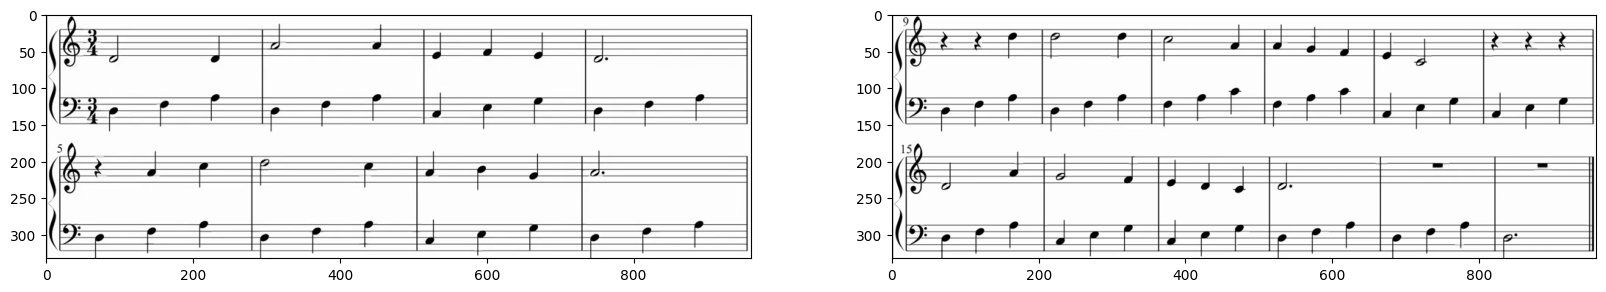

interactive(children=(IntSlider(value=0, description='frame', max=815), IntSlider(value=0, description='shift'…

<function __main__.show(frame, shift)>

In [7]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')
_, frame = bfc.get_frame(cap, 10)
img1 = bfc.crop_frame(frame, 8, 158, 340-8, 960)
_, frame = bfc.get_frame(cap, 700)
img2 = bfc.crop_frame(frame, 8, 158, 340-8, 960)
# show img1 and img2 left and right
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

def show(frame, shift):
    means = np.load(f'npy/stds_{shift}.npy')
    meansRGB = np.zeros((means.shape[0],means.shape[1]))
    for i in range(means.shape[0]):
        meansRGB[i] = np.mean(means[i], axis=1)
    plt.figure(figsize=(20,5))
    plt.plot(range(20,61), meansRGB[frame][20:61])
    plt.ylim(0,255)
    plt.scatter(range(20,61), meansRGB[frame][20:61], c=meansRGB[frame][20:61])
    for i in range(20,61):
        if meansRGB[frame][i] > 20:
            plt.text(i, meansRGB[frame][i], name_notes[i])
    plt.show()

interact(show, frame=widgets.IntSlider(min=0,max=means.shape[0]-1,step=1,value=0), shift=widgets.IntSlider(min=0,max=14,step=1,value=0))

## Detect keys pressed

Number of connected components: 88


  0%|          | 0/36 [00:00<?, ?it/s]

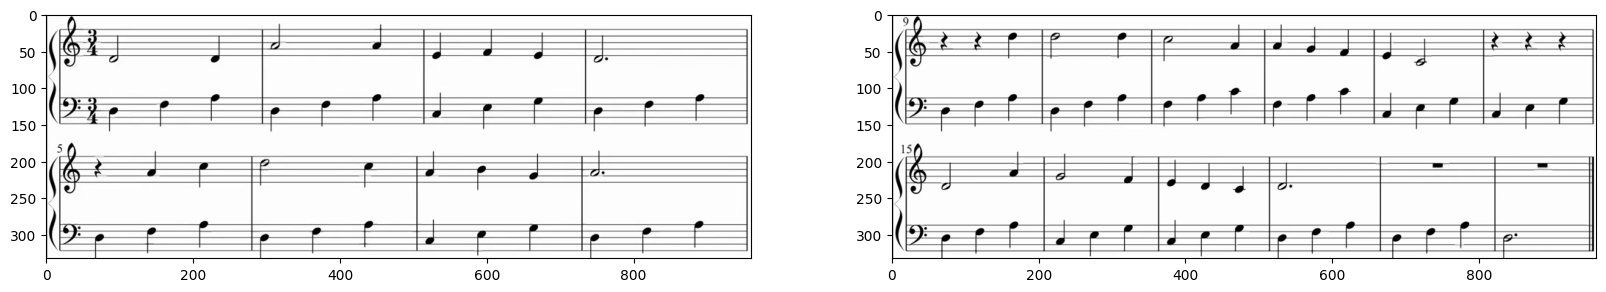

interactive(children=(IntSlider(value=0, description='frame', max=815), IntSlider(value=0, description='shift'…

<function __main__.show(frame, shift, threshold)>

In [8]:
cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')

image = bfc.get_frame(cap, 814)[1]
image = bfc.crop_frame(image, 375, 0, 540-375, image.shape[1], show=False)
pipe = pkn.pipeline(image, with_hull=True, threshold = 4000, kx=15, crop=[10,7,15,19], min_area=300, max_width=200, show=False)
labels, black_keys, white_keys, n_labels, stats, centroids, group, notes, sobel = pipe

_, frame = bfc.get_frame(cap, 10)
img1 = bfc.crop_frame(frame, 8, 158, 340-8, 960)
_, frame = bfc.get_frame(cap, 700)
img2 = bfc.crop_frame(frame, 8, 158, 340-8, 960)
# show img1 and img2 left and right
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

b = [0,0,255]

def show(frame, shift, threshold):
    means = np.load(f'npy/stds_{shift}.npy')
    meansRGB = np.zeros((means.shape[0],means.shape[1]))
    for i in range(means.shape[0]):
        meansRGB[i] = np.mean(means[i], axis=1)
    plt.figure(figsize=(20,5))
    plt.plot(range(20,61), meansRGB[frame][20:61])
    plt.ylim(0,255)
    plt.axhline(y = threshold, color = 'r', linestyle = '-')
    plt.scatter(range(20,61), meansRGB[frame][20:61], c=meansRGB[frame][20:61])
    list_notes = []
    for i in range(20,61):
        if meansRGB[frame][i] > 20:
            plt.text(i, meansRGB[frame][i], name_notes[i])
        if frame > 2 and frame < means.shape[0] - 2:
            if np.mean(np.array([meansRGB[frame + j][i] for j in [-2,-1,0,1,2]])) < threshold:
                list_notes.append(name_notes[i])
    n = len(list_notes)
    if n > 3: # suspicion of false note detected, need to lower the 
        list_notes = []
        for i in range(20,61):
            if meansRGB[frame][i] > 20:
                plt.text(i, meansRGB[frame][i], name_notes[i])
            if frame > 2 and frame < means.shape[0] - 2:
                if np.mean(np.array([meansRGB[frame + j][i] for j in [-2,-1,0,1,2]])) < threshold - (n - 3) * 4:
                    list_notes.append(name_notes[i])
    _, new_frame = bfc.get_frame(cap, frame)
    img = bfc.crop_frame(new_frame, 375, 0, 540-375, image.shape[1])
    print(list_notes)
    if list_notes:
        _ = pkn.highlight_notes(image=img, labels=labels, notes = list_notes, dict_notes = notes, color = [b] * len(list_notes), show=True)
    plt.show()
    
interact(show, frame=widgets.IntSlider(min=0,max=means.shape[0]-1,step=1,value=0),
         shift=widgets.IntSlider(min=0,max=14,step=1,value=0), threshold=widgets.IntSlider(min=0,max=255,step=1,value=75))

## Save result

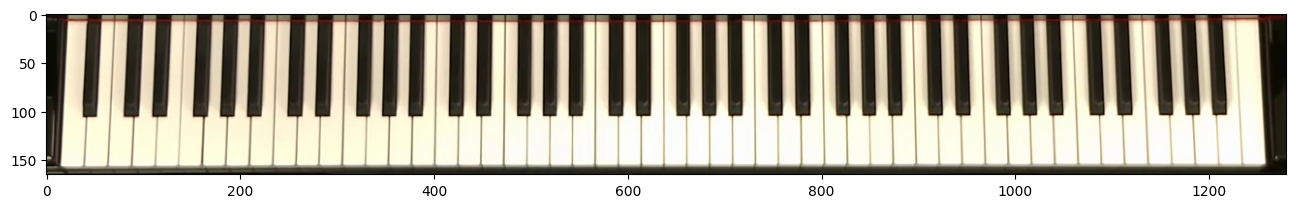

Number of connected components: 88


  0%|          | 0/36 [00:00<?, ?it/s]

In [9]:
# Crop the video to keep only the piano
# Save the video as a new file

cap = cv2.VideoCapture('mp4/scarborough_fair.mp4')

image = bfc.get_frame(cap, 814)[1]
image = bfc.crop_frame(image, 375, 0, 540-375, image.shape[1], show=True)
pipe = pkn.pipeline(image, with_hull=True, threshold = 4000, kx=15, crop=[10,7,15,19], min_area=300, max_width=200, show=False)
labels, black_keys, white_keys, n_labels, stats, centroids, group, notes, sobel = pipe

b = [0,0,255]

def get_image(frame, shift=0, line=70):
    means = np.load(f'npy/stds_{shift}.npy')
    meansRGB = np.zeros((means.shape[0],means.shape[1]))
    for i in range(means.shape[0]):
        meansRGB[i] = np.mean(means[i], axis=1)
    list_notes = []
    for i in range(20,61):
        if frame > 2 and frame < means.shape[0] - 2:
            if np.mean(np.array([meansRGB[frame + j][i] for j in [-2,-1,0,1,2]])) < line:
                list_notes.append(name_notes[i])
    m = len(list_notes)
    if m > 3:
        list_notes = []
        for i in range(20,61):
            if meansRGB[frame][i] > 20:
                plt.text(i, meansRGB[frame][i], name_notes[i])
            if frame > 2 and frame < means.shape[0] - 2:
                if np.mean(np.array([meansRGB[frame + j][i] for j in [-2,-1,0,1,2]])) < line - (m - 3) * 4:
                    list_notes.append(name_notes[i])
    _, new_frame = bfc.get_frame(cap, frame)
    img = bfc.crop_frame(new_frame, 375, 0, 540-375, image.shape[1])
    if list_notes:
        img = pkn.highlight_notes(image=img, labels=labels, notes = list_notes, dict_notes = notes, color = [b] * len(list_notes), show=False)
    return img

In [ ]:
from tqdm import tqdm

fourcc = cv2.VideoWriter_fourcc(*'h264')
out = cv2.VideoWriter('mp4/key_pressed_detection.mp4', # or .mkv
    fourcc, cap.get(cv2.CAP_PROP_FPS),
    (image.shape[1], 540-375))

cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

n = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
for i in tqdm(range(0, n)):
    ret, _ = cap.read()
    if not ret:
        break
    frame = get_image(i)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    out.write(frame)

out.release()
cv2.destroyAllWindows() # Close all windows